In [ ]:
#Collaboration with Caston, Davis and Karabo.

In [ ]:
import pandas as pd
import numpy as np
import io
import requests
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)
%matplotlib inline
import matplotlib.pyplot as plt
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Predictive and modelling analysis of graduate unemployment in South Africa**
---



# **Table of Contents**

* [Executive Summary](#exec)

* [Introduction](#intro)

* [Overview of Methodology](#om)

* [Data Description](#dd)

* [Data Wrangling](#dw)

* [Exploratory Analyses](#ea)

* [Model Fitting](#mf)

  * [Logistic Regression - Model 1](#m1)

  * [Logistic Regression - Model 2](#m2)

  * [Logistic Regression - Model 3](#m3)

  * [Logistic Regression - Model 4](#m4)


<a name="exec"></a>
# **Executive Summary**
The scourge of unemployment in South Africa is heavily skewed towards the youth and the educated youths are not spared. In this notebook, we investigated the factors that contribute to the high number of unemployed graduates and also predicted whether a graduate will be employed or not. 

To investigate the issue, we collected data from Statistics South Africa (StatsSA), cleaned it, performed exploratory analysis and developed the model. It was confirmed in the exploration analysis that graduates belonging to the white population group and those from the Western Cape province have the highest employment rate.

The model determined the key factors and their weights that contribute to graduate unemployment and to be able to predict unemployment among the youths that have a tertiary education. 

The main results indicated that there is a correlation between unemployment and study choices and demographics. It was also evident that advancing levels of educations does significantly reduce the chances of graduate unemployment. Ensuring that more students choose studies aligned to the identified critical skills can play a major factor in reducing youth unemployment. However, there are still disparities among the different provinces with regards to youth unemployment.

Due to the fact there was a lot of missing data that we could not fill, we were limited to a smaller sample.




<a name='intro'></a>
# **Introduction**
South Africa has a high youth unemployment rate even among those that have acquired skills resulting in the youths not fully participating in the economy. Young people are not acquiring the skills/experience required to drive the economy forward, which creates a burden to the state as it would have to provide social assistance. It also creates other social costs such crime, poverty, inequality and political/economic instability.

The number of graduate unemployment cases in South Africa raises daily. Among graduates in the 15-24 age group, the unemployment rate was 31.0% in the 1st quarter of 2019 compared to 19.5% in the 4th quarter of 2018 – an increase of 11.4 percentage-points quarter-on-quarter. Why is that the case when employment should be a major driver in eradicating poverty?

**Question 1:** What are the main factors affecting youth unemployment in South Africa?
* **Hypothesis:** There is a correlation between graduate unemployment in South Africa and various study choices and demographics.

**Question 2**<br>
  **Question 2.1:** Do study choices affect the chances of graduate youth employment?

  **Question 2.2:** Is there an inadequate proportion of education studies that correspond to the critical skills list of South Africa versus those that are not? Could that be related to the high number of unemployed youth?
  * **Hypothesis:** Graduates that are unemployed studied courses that are not related to critical skills and acquired the lowest NQF level.

**Question 3:** What are the effects of proceeding with your education on employment? 
  * **Hypothesis:** A graduate with a higher national qualification framework (NQF) level is less likely to be unemployed.

**Question 4:** In which area are graduates more likely to be employed?
  * **Hypothesis:** Graduates staying in certain provinces have higher chances of employment.


<a name='om'></a>
# **Overview of Methodology**
The research questions aimed to infer what was true, on average, for the graduate youths population in the South African labour market from the analysis we performed from the representative sample.<br/>

We identified problems with the data, and conducted initial analyses to further refine the questions. We performed data preparation, data visualisation and calculating summary statistics.
<br/>

We built four (4) models for each subset of questions. For each model, we defined the initial model, which interactively refitted based on the evaluations performed. We evaluated the models by performance measures particularly the Psuedo R-squared, residual analysis, and outlier detection. We then tested the best models using a test dataset.


We created a regression model using machine learning to predict whether a graduate will be employed or not given census data for registered students. This model could be used for the following:
*   Advise students on how they can improve their choices before they can enrol for their tertiary education.
*   Government and Tertiary institutions can use this model for academic planning.<br/>

We explained the results of the model building and interpreted them in comparison to previous knowledge and expectations.<br/>

We compiled a report with a high degree of detail which will be useful to students, academic planners and government economic and higher tertiary planners.

<a name='dd'></a>
# **DataSet Description**

StatsSA used Computer-assisted Telephone Interviewing to collect the data during the quarter four period of year 2020. The collection method changed from door-to-door survey method to telephonic survey method. However, we assume that the change in the mode of data collection won't have an effect in answering the question. For this project we obtained data from the Statistics South Africa (StatsSA) that was downloaded on the 17/03/21. The full description of the Quarterly Labour Force Survey (4th Quarter 2020) dataset is on the StatsSa website: http://nesstar.statssa.gov.za:8282/webview/. The dataset size was 48 990 rows X 161 columns.

Below are census variables we were concerned with in this project:<br/>
Gender, population, Highest education level, study field, education level, age, province, Geography Type, metro/non-metro and employment status.
<a name='province'></a>
##### **Province**
The province where the respondent resides. The values are as follows:

1 - Western Cape<br/>
2 - Eastern Cape<br/>
3 - Northern Cape<br/>
4 - Free State<br/>
5 - KwaZulu-Natal<br/>
6 - North West<br/>
7 - Gauteng<br/>
8 - Mpumalanga<br/>
9 - Limpopo<br/>

##### **Gender** (Q13GENDER)
The gender of the respondent

1 - Male<br/>
2 - Female<br/>

##### **Age** (Q14AGE)
The age of the respondent
<a name='study'></a>
##### **Study field** (Q18FIELD)
This variable applies to respondets that have obtained a post-school qualification. This indicates the field in which the post-school qualification was obtained.

1 - Agriculture or Renewable natural resources-1<br/>
2 - Architecture or environmental design-1<br/>
3 - Arts; Visual or Performing-0<br/>
4 - Business; commerce and management studies-1<br/>
5 - Communication-1<br/>
6 - Computer science-1<br/>
7 - Education; training or development-1<br/>
8 - Engineering or engineering technology-1<br/>
9 - Health care or health sciences-1<br/>
10 - Home economics-0<br/>
11 - Industrial arts; traders or technology-0<br/>
12 - Languages; linguistic or literature-0<br/>
13 - Law-0<br/>
14 - Libraries or museums-0<br/>
15 - Life sciences or physical sciences-1<br/>
16 - Mathematical sciences-1<br/>
17 - Military sciences-1<br/>
18 - Philosophy; religion or theology-0<br/>
19 - Physical education or leisure-0<br/>
20 - Psychology-0<br/>
21 - Public administration or social services-0<br/>
22 - Social sciences or social studies-0<br/>
23 - Othe-0r<br/>
24 - Management-1<br/>
25 - Marketing-1<br/>
26 - Information technology and computer science-1<br/>
27 - Finance; economics and accounting-1<br/>
28 - Office administration-0<br/>
29 - Electrical infrastructure construction-1<br/>
30 - Civil engineering and building construction-1<br/>
31 - Engineering-1<br/>
32 - Primary agriculture-1<br/>
33 - Hospitality-0<br/>
34 - Tourism-0<br/>
35 - Safety in society-0<br/>
36 - Mechatronics-1<br/>
37 - Education and development-1<br/>
38 - Other-0 <br/>

<a name='highest_edu'></a>
##### **Highest education level** (Q17EDUCATION)
This variable signifies the highest qualification the correspont has already acquired.

14 - NTC l/N1/NIC/(v) Level 2<br/>
15 - NTC II/N2/NIC/(v) Level 3<br/>
16 - NTC III/N3/NIC/(v) Level 4<br/>
17 - N4/NTC 4<br/> 
18 - N5/NTC 5<br/>
19 - N6/NTC 6<br/>
20 - Certificate with less than Grade 12/Std 10<br/>
21 - Diploma with less than Grade 12/Std 10<br/>
22 - Certificate with Grade 12/Std 10<br/>
23 - Diploma with Grade 12/Std 10<br/>
24 - Higher Diploma<br/>
25 - Post Higher Diploma (Masters; Doctoral Diploma)<br/>
26 - Bachelors Degree<br/>
27 - Bachelors Degree and Post Graduate Diploma<br/>
28 - Honours Degree<br/>
29 - Higher Degree (Masters/Phd)<br/>

##### **Population group** (Q15POPULATION)
The population group signify the race of the person.

1 - African/Black<br/>
2 - Coloured<br/>
3 - Indian/Asian<br/>
4 - White<br/>

##### **Geography Type** (Geo_type_code)
The type of geography of the area in which the respondent lives

1 - Urban<br/>
2 - Traditional<br/>
3 - Farms<br/>

<a name='metro_code'></a>
##### **Metro/Non-Metro** (Metro_code)

1 - WC - Non Metro<br/>
2 - WC - City of Cape Town<br/>
3 - EC - Non Metro<br/>
4 - EC - Buffalo City<br/> 
5 - EC - Nelson Mandela Bay<br/>
6 - NC - Non Metro<br/>
7 - FS - Non Metro<br/> 
8 - FS - Mangaung<br/>
9 - KZN - Non Metro<br/> 
10 - KZN - eThekwini<br/> 
11 - NW - Non Metro<br/> 
12 - GP - Non Metro<br/>
13 - GP - Ekurhuleni<br/> 
14 - GP - City of Johannesburg<br/> 
15 - GP - City of Tshwane<br/> 
16 - MP - Non Metro<br/>
17 - LP - Non Metro<br/>

#### **Employment Status Expanded** (Status_exp)
1 - Employed<br/>
2 - Unemployed<br/>
4 - Not economically active<br/>




#### **Data Validation**
https://www.statista.com/statistics/1116076/total-population-of-south-africa-by-population-group/
https://www.statista.com/statistics/967928/total-population-of-south-africa-by-gender/

*   **Race ratios:** The sample race ratios normalised to 100 are such that for every 100 people, there are 85 Blacks, 8 Coloureds, 5 Indian/Asians and 2 Whites. The latest South African population ratios as per the latest census data are such that for every 100 people, there are 81 Blacks, 9 Coloureds, 2 Indians/Asians and 8 Whites. The sample race demographics are closer to the population ratios, although there is a slight mismatch for the Whites as they are underrepresented.     

*   **Gender ratios** The sample race ratios normalised to 100 are such that for every 100 people, there are 53 Females and 47 Males. The latest South African population ratios as per the latest census data are such that for every 100 people, there are 51 Females versus 49 Males. The sample gender demographics are closer to the population ratios. 



#### **Aspects of Data Quality**

*   **Validity / Integrity:** To check the integrity of the data, we inspected the Age values and noted that the minimum age was 15 and the maximum age was 95. This age range looked normal considering that the mean age came to 41 years, which is a normal working age.

*   **Completeness / Comprehensiveness:** All of the fields mentioned above needed to be populated for us to be able to have insight in terms of which factors affect employement amongst the graduates. We therefore dropped any data with missing data. Records with missing data were excluded as there was no other way intrepolate them.

*   **Consistency:** All records have the same format and will contain the same selected fields.

*   **Accuracy:** We compared the ratios of the sample data demographics against census data. The ratios were within a reasonable range.  

*   **Uniformity:** We noted that the data conformed to the codes that were used in the capturing of the data. Except for the NULL values, we checked for any values that were not in the set of the data codes and no such data was picked.




#### **Ability to Answer Question**
* We only selected data for the youth age group because we were interested in understanding the factors affecting youth employment.
* We also only selected samples where the user has at least completed a qualification above matric. We assumed that with an education, one must not be unemployed.

<a name='dw'></a>
# **Data Wrangling**

### **Data ingestion**
We downloaded the data set from the StatsSA datasets and stored it on our github account were we ingested it from.

In [ ]:
url1="https://raw.githubusercontent.com/davis-hub/Collab-dataset/main/QLFS-2020-01_F2.csv"
url2="https://raw.githubusercontent.com/davis-hub/Collab-dataset/main/QLFS-2020-02_F1.csv"
url3="https://raw.githubusercontent.com/davis-hub/Collab-dataset/main/QLFS-2020-03_F1.csv"
url4="https://raw.githubusercontent.com/davis-hub/Collab-dataset/main/QLFS-2020-04_F1.csv"
s1=requests.get(url1).content
s2=requests.get(url2).content
s3=requests.get(url3).content
s4=requests.get(url4).content
original_data1 = pd.read_csv(io.StringIO(s1.decode('utf-8')))
original_data2 = pd.read_csv(io.StringIO(s2.decode('utf-8')))
original_data3 = pd.read_csv(io.StringIO(s3.decode('utf-8')))
original_data4 = pd.read_csv(io.StringIO(s4.decode('utf-8')))

### **Data Cleaning & Data Comparison (Raw vs Cleaned)**
* We concatenated all the four (4) datasets for each quarter into one dataset.
* Dropping null values: We couldn't recover the missing values using the data from the other columns e.g. we couldn't create lookup tables or guess if someone is male or female from the other variables, etc, so we dropped all the null values.
* The data dropped from 209 917 records to 18 023 records after we removed the felds with null values. 
* We are assuming that the large data set dropped due to missing values won't affect the distribution of the variables.
* We further dropped duplicates and the records dropped further to 13 183 

In [ ]:
#joining the 4 datasets
original_data = pd.concat([original_data1, original_data2, original_data3, original_data4])

#drop nan values
data = original_data[['Q13GENDER','Q15POPULATION','Q17EDUCATION','Q18FIELD','Q14AGE','Metro_code',
                      'Province','Geo_type_code','Status_exp']].dropna()

#checking for duplicates
data.drop_duplicates(keep='last', inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13183 entries, 16 to 48982
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Q13GENDER      13183 non-null  int64  
 1   Q15POPULATION  13183 non-null  int64  
 2   Q17EDUCATION   13183 non-null  int64  
 3   Q18FIELD       13183 non-null  float64
 4   Q14AGE         13183 non-null  int64  
 5   Metro_code     13183 non-null  int64  
 6   Province       13183 non-null  int64  
 7   Geo_type_code  13183 non-null  int64  
 8   Status_exp     13183 non-null  float64
dtypes: float64(2), int64(7)
memory usage: 1.0 MB


Changing all the float values to integer for consistency.

In [ ]:
data['Q18FIELD'] = data['Q18FIELD'].astype('int')
data['Status_exp'] = data['Status_exp'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13183 entries, 16 to 48982
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Q13GENDER      13183 non-null  int64
 1   Q15POPULATION  13183 non-null  int64
 2   Q17EDUCATION   13183 non-null  int64
 3   Q18FIELD       13183 non-null  int64
 4   Q14AGE         13183 non-null  int64
 5   Metro_code     13183 non-null  int64
 6   Province       13183 non-null  int64
 7   Geo_type_code  13183 non-null  int64
 8   Status_exp     13183 non-null  int64
dtypes: int64(9)
memory usage: 1.0 MB


- **Selecting data of corncern:** In this project we only worked with people in the age of 19 to 35 as they consitute the youth age group. We also selected those that have tertiary qualification as they are the ones considered youth graduates.
- This further reduced the number of the rows from 13 183 to 5 289. 

In [ ]:
youth = data[(data.Q14AGE>18)&(data.Q14AGE<36)&(data.Q17EDUCATION>13)&(data.Q17EDUCATION<30)].copy()
youth.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5289 entries, 104 to 48982
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Q13GENDER      5289 non-null   int64
 1   Q15POPULATION  5289 non-null   int64
 2   Q17EDUCATION   5289 non-null   int64
 3   Q18FIELD       5289 non-null   int64
 4   Q14AGE         5289 non-null   int64
 5   Metro_code     5289 non-null   int64
 6   Province       5289 non-null   int64
 7   Geo_type_code  5289 non-null   int64
 8   Status_exp     5289 non-null   int64
dtypes: int64(9)
memory usage: 413.2 KB


- We changed data types from integers to categorical data type to match the data encoding except for the age variable.


In [ ]:
youth.Q18FIELD = pd.Categorical(youth.Q18FIELD, categories=[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38], ordered=True)
youth.Q13GENDER = pd.Categorical(youth.Q13GENDER, categories=[1,2], ordered=True)
youth.Q15POPULATION = pd.Categorical(youth.Q15POPULATION, categories=[1,2,3,4], ordered=True)
youth.Q17EDUCATION = pd.Categorical(youth.Q17EDUCATION, categories=[14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], ordered=True)
youth.Metro_code = pd.Categorical(youth.Metro_code, categories=[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17], ordered=True)
youth.Province	 = pd.Categorical(youth.Province	, categories=[1, 2, 3, 4, 5, 6, 7, 8, 9], ordered=True)
youth.Geo_type_code = pd.Categorical(youth.Geo_type_code, categories=[1,2,3], ordered=True)
youth.Status_exp = pd.Categorical(youth.Status_exp, categories=[1,2,4], ordered=False)
youth.tail()

,Q13GENDER,Q15POPULATION,Q17EDUCATION,Q18FIELD,Q14AGE,Metro_code,Province,Geo_type_code,Status_exp
48881,1,1,15,38,35,17,9,2,1
48953,1,1,15,31,35,17,9,2,1
48955,2,1,19,28,35,17,9,2,1
48981,1,1,23,8,34,17,9,2,1
48982,2,1,23,9,29,17,9,2,1


<a name='ea'></a>
# **Exploratory Analyses**

#### **Age vs Employement Status**

- In the plot below, the average age of  an employed youth is 30 years and the average  of an unemployed youth 27 years.  
- At an average age of  25 years, the  youths will not be actively looking for work. 
- It seems that chances of employement are higher as you grow older.

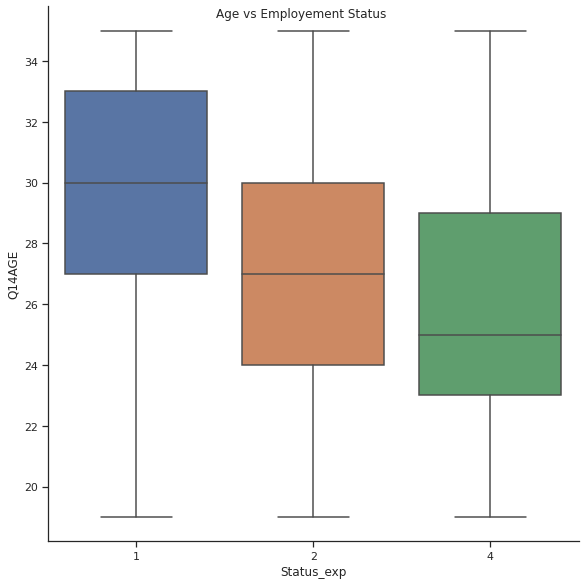

In [ ]:
rp = sns.catplot(x="Status_exp", y="Q14AGE", kind="box", data=youth, height=8, aspect=1);
rp.fig.suptitle('Age vs Employement Status');

#### **Age vs Employement Status per Gender**

- The average age of employed graduate is 30  years for both young graduate females (2) and males (1).  
- Also, the average age of an unemployed youth is 27 years for both young women men.

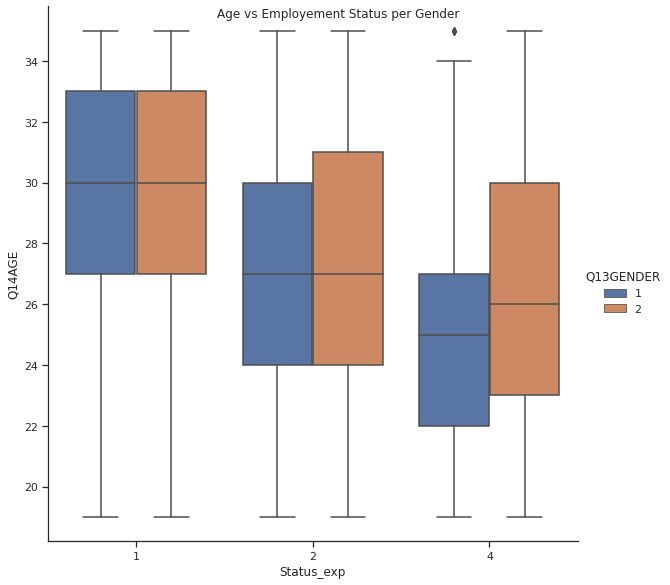

In [ ]:
rp = sns.catplot(x="Status_exp", y="Q14AGE", kind="box", data=youth, hue='Q13GENDER', height=8, aspect=1);
rp.fig.suptitle('Age vs Employement Status per Gender');

#### **Employement Status per Province**

- Western Cape (1) and Northern Cape (3) have a very good proportion of young graduates that are employed versus the unemployed graduates. 
- Gauteng (7) province has a marginal proportion while the rest have poor proportions of young graduates that are employed. 
- Limpopo (9) has the worst employment rate as it has more unemployed youth graduates than employed.
- Graduates have a better chance of being employed in the Western and Northern Cape compared to all other provinces.

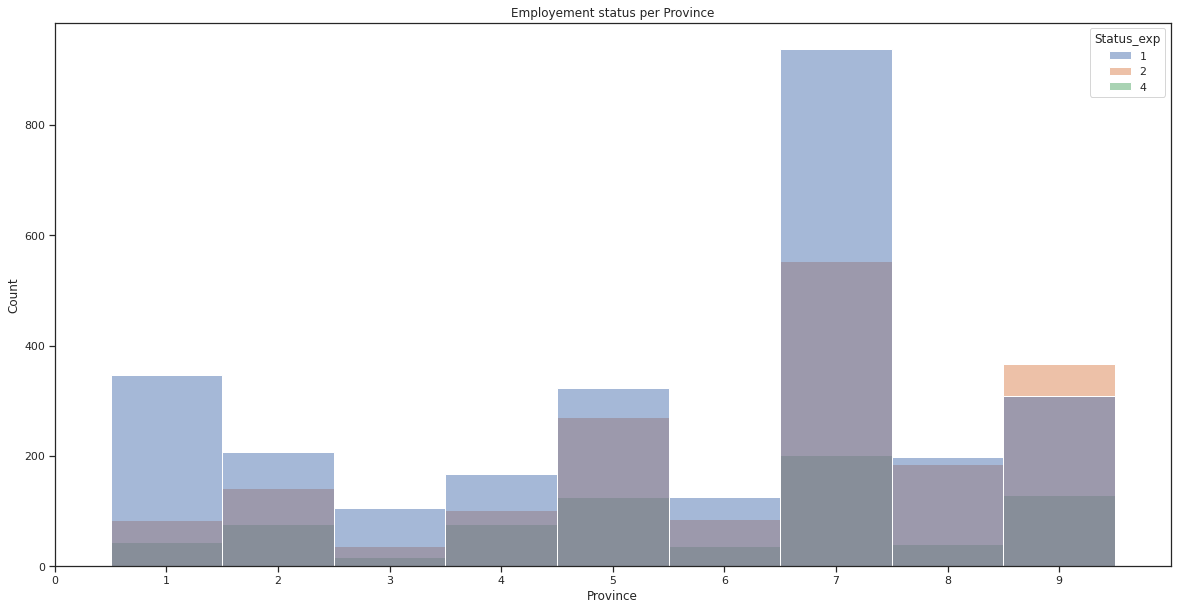

In [ ]:
fi, ax = plt.subplots(figsize=(20,10))
sns.histplot(ax=ax, data=youth, x = 'Province', hue="Status_exp");
ax.set_title("Employement status per Province");
ax.set_xlim(0,10);
ax.set_xticks(range(0,10));

#### **Employment Status per Metro/Non-metro**

- The employment rate in Metros is better than in non-metros (*compare adjacent bars e.g. 1 & 2, 3 & 4 and so on*).

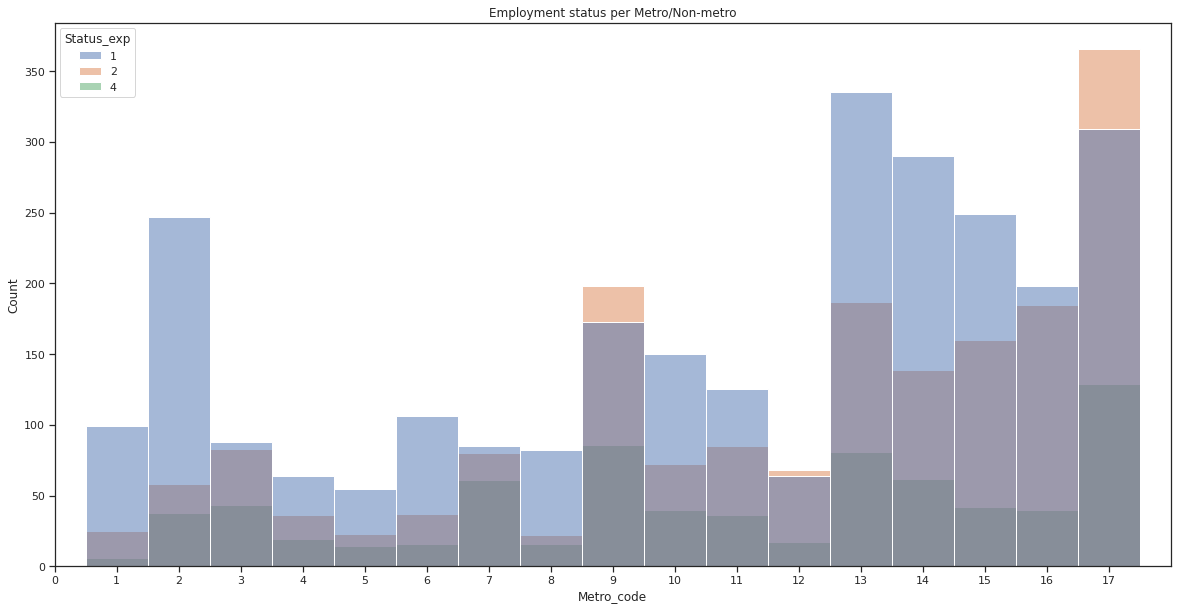

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.histplot(ax=ax, data=youth, x ='Metro_code', hue="Status_exp");
ax.set_title('Employment status per Metro/Non-metro');
ax.set_xlim(0,18);
ax.set_xticks(range(0,18));

#### **Employment Status per Geography type**

* Farming areas (3) have the highest employment rate however,  they service a small portion of the labour force.
* The urban (1) areas have the bulk of the labour force  with more young people employed than unemployed.
* Traditional areas (2)  have more graduate youths that are unemployed than employed


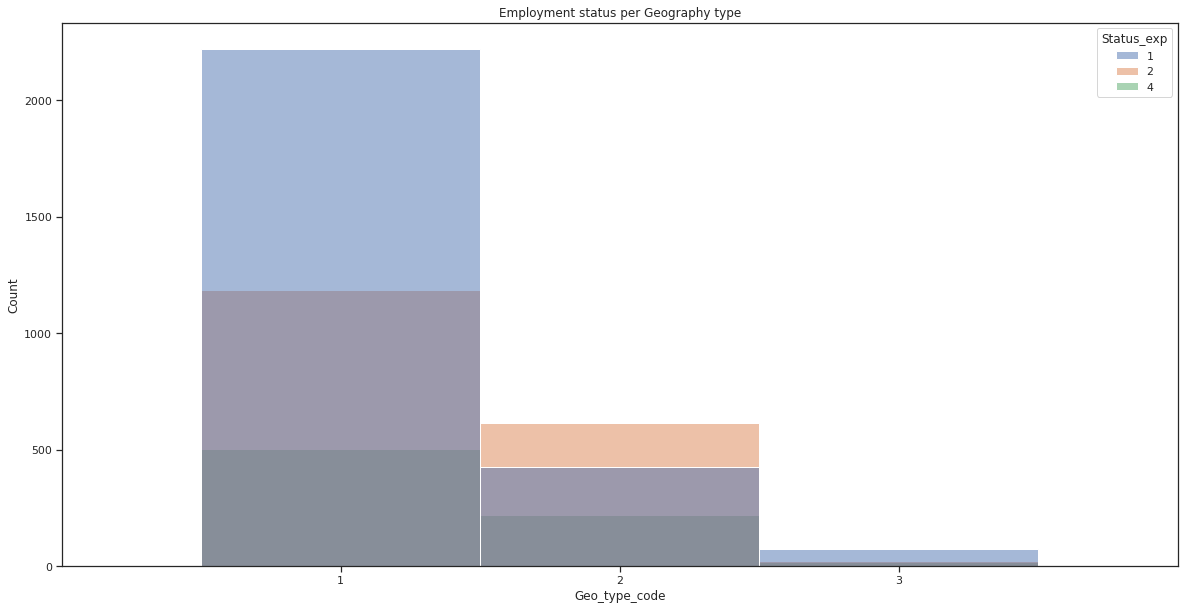

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.histplot(ax=ax, data=youth, x = 'Geo_type_code', hue="Status_exp");
ax.set_title('Employment status per Geography type');
ax.set_xlim(0,4);
ax.set_xticks([1,2,3]);

#### **Employment Status per Study Field**

The most popular study fields are:

* Business; Commmerce and Management studies (4)
* Education; training and development (7)
* Health care or health  sciences (9)
* Management (24)
* Engineering or  Engineering Technology (8)<br/>

Popular study fields, generally have more number of people that are employed than those who are unemployed (exluding those that are not economically active) but that is not the case for Management, this could be a popular study field with a negative employment. 

The following study fields have more unemployed graduates than employed graduates:
* Office administration (28)
* Management (24)
* Education and development (37)
* Psychology (20)
* Communication (5)
* Tourism (34)
* Hospitality (33)
* Primary agriculture (32)

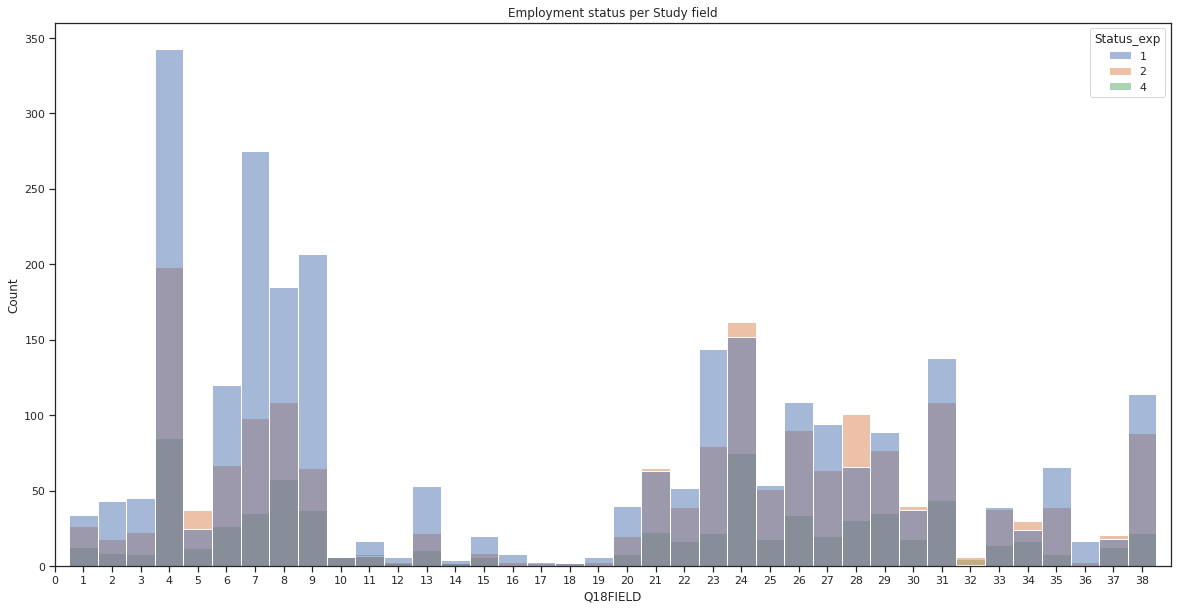

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.histplot(ax=ax, data=youth, x = 'Q18FIELD', hue="Status_exp");
ax.set_title('Employment status per Study field');
ax.set_xlim(0,39);
ax.set_xticks(range(0,39));

#### **Employment Status per Highest education level**

* More young people who graduated with a lower level certificate, particularly the National Trade Certificates from the TVET colleges, are unemployed. However, as you increase the NQF level,  the employment opportunities improve as more people are employed than unemployed (*read from left to right*).
* The chances of employment significantly improve once one has acquired at least a diploma and they significantly improve as the NQF level increases.

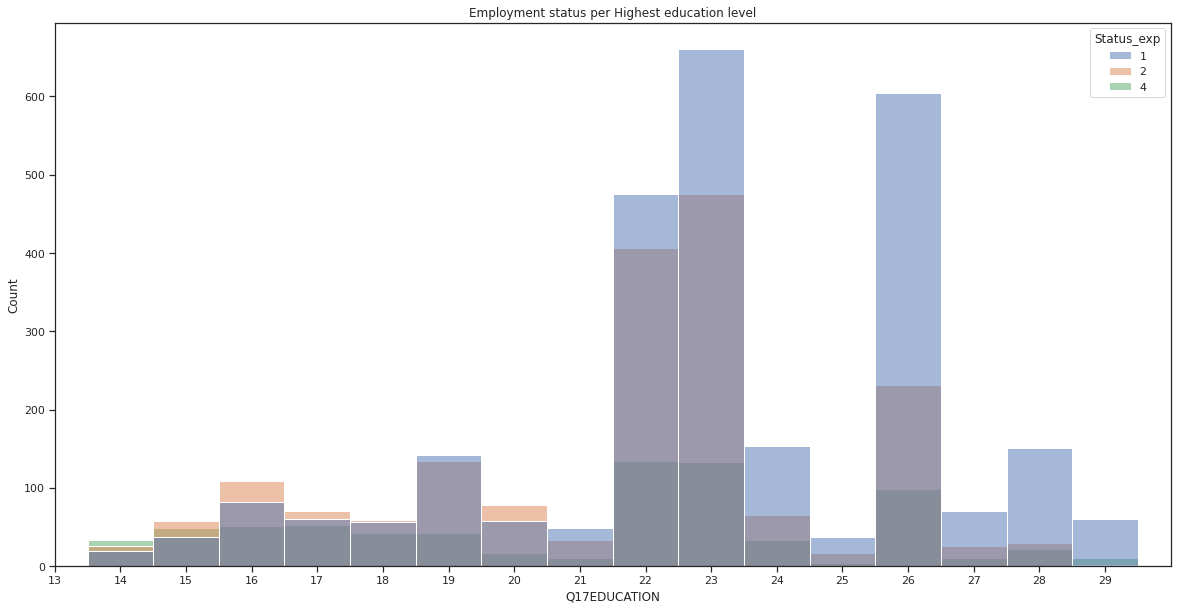

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.histplot(ax=ax, data=youth, x = 'Q17EDUCATION', hue="Status_exp");
ax.set_title('Employment status per Highest education level');
ax.set_xlim(13,30);
ax.set_xticks(range(13,30));

#### **Employment Status per Population group**

- White people (4) have a higher employment rate as they have more young people employed than unemployed, followed by Asians/Indians (3) and Coloureds (2).
- Africans (1), in general, have more young people that are both employed and unemployed. 
-The employment rate among Africans is the lowest compared to other population groups.

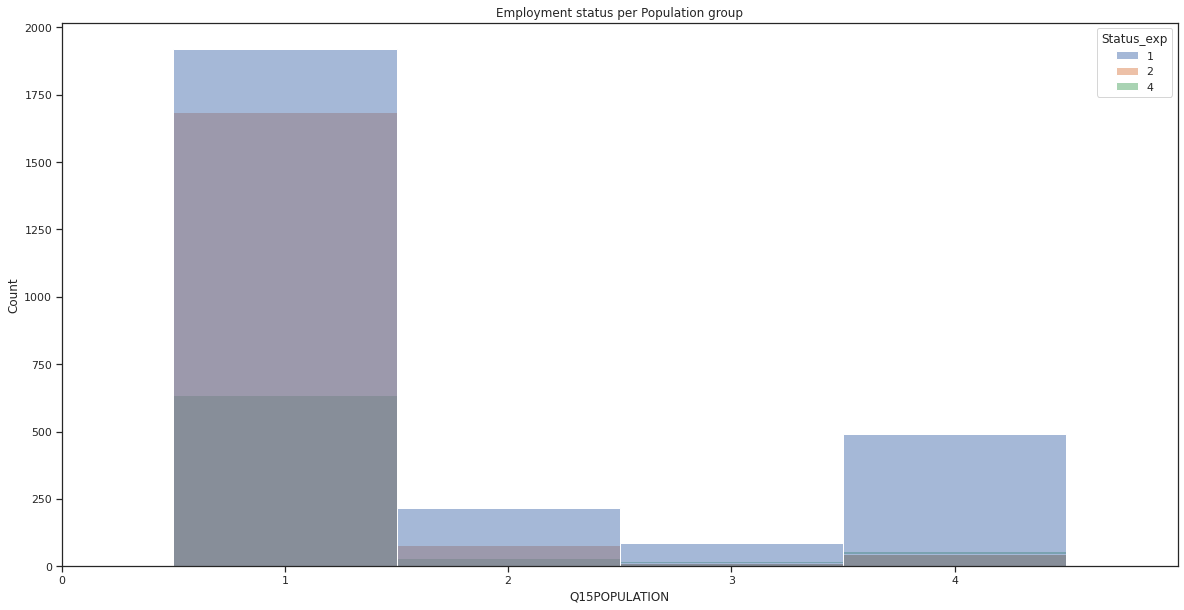

In [ ]:
zfig, ax = plt.subplots(figsize=(20,10))
sns.histplot(ax=ax, data=youth, x = 'Q15POPULATION', hue="Status_exp");
ax.set_title('Employment status per Population group');
ax.set_xlim(0,5);
ax.set_xticks(range(0,5));

### **Accuracy**
https://www.statista.com/statistics/1129481/unemployment-rate-by-population-group-in-south-africa/
https://www.thesouthafrican.com/news/why-unemployment-rate-change-lockdown-job-losses-province-south-africa/

- Our analysis noted that Whites had the best employment rate compared to all races, followed by Indians/Asians, Coloureds and Africans, respectively. We cross-referenced with Statista, which is a German-based company specialising in market and consumer data. They indicated that this was the trend for a long time, and in Q4 of 2020, the unemployment rates per races were as follows: Whites (8.8%), Indians/Asians (11.8%), Coloureds (25.7%) and Africans (36.5%).  
- We noted that the Western Cape had the least unemployment rate, and Limpopo had the worst unemployment rate. When we cross-referenced with the Southern African article on unemployment rates per province, it highlighted that the Western Cape had the best unemployment rate (27.3%). However, the Northern Cape was not the second-best but was a distant fourth (45.1%), and Limpopo was not the worst but second worst (46.5%). The difference could be that this article only referred to Q3 2020 data, not the overall trend. 

<a name='mf'></a>
# **Model Fitting**
### **Model Fitting Methodology**
The model fitting methodology ensured that the discovered initial model did not overfit. We separated the model testing from the model discovery, as shown below.
- Initial Modelling: regressions, stepwise regressions.
- Evaluation:
  - For performance evaluation we used Pseudo F Squared.
  - For model selection, we selected the model with the best Pseudo F Squared score.  
  - We performed residual analysis to evaluate if the assumptions still hold.
  - Outliers were detected and data post-processing conducted.
- Model Refitting (we would have repeated previous steps if necessary.)
- Model Testing
- Final Analysis and Conclusion

### **Assumptions**
* We dropped all records with employment status equal to "Not economically active". The assumption was that each candidate after graduation should be employed or unemployed, those that are not economically active have nothing to do with regards to seeking employement.
* Due to the dropping of the records with employment status equal to "Not economically active", the dataset shrank from 5 289 to 4 543. We also made the assumption that the distribution of the data is not affected.


<a name='m1'></a>
# **Logistic Regression - Model 1**
### **Description of Model 1**

* This problem is a binary classification which is defined as $y_i = \left\{ \begin{array}{rcl} 0 & \text{if unemployed} \\ 1 & \text{if employed}     \end{array}\right.$
* Because it's a binary classification problem, the natural choice is the logistic regression model.
* **Logistic Regression**: <br/>
  * Under the logistic regression, the model is then given by the following logistic function: $\log(\text{odds of being unemployed}) = \beta_0 + \beta_1 * \text{Gender} + \beta_2 * \text{Race} + \beta_3 * \text{Education Level} + \beta_4 * \text{Age} + \beta_5 * \text{Province}$


### **Coding Variables**

-  Since we have a lot of categorical variables in our regression models, we had to convert the categories into indicator variables.
- We used Dummy encoding to split categories into indicator variables. Note, this is used when an intercept is included in the model.


In [ ]:
#youth2 = youth[youth['Status_exp']!=4]
#youth1 = youth2.copy()
#youth1['Q17EDUCATION'] = youth1['Q17EDUCATION'].astype('int')
#youth1 = pd.get_dummies(youth1, columns=['Q13GENDER', 'Q15POPULATION', 'Q18FIELD', 
         #'Metro_code', 'Province', 'Geo_type_code', 'Status_exp'], drop_first=True)

#youth1 = youth1.drop(['Status_exp_4'], axis=1)

In [ ]:
youth2 = youth[youth['Status_exp']!=4]
youth1 = youth2[['Q13GENDER', 'Q14AGE', 'Q15POPULATION', 'Q17EDUCATION','Province', 'Status_exp']].copy()
youth1['Q17EDUCATION'] = youth1['Q17EDUCATION'].astype('int')
youth1 = pd.get_dummies(youth1, columns=['Q13GENDER', 'Q15POPULATION','Province', 'Status_exp'], drop_first=True)
youth1 = youth1.drop(['Status_exp_4'], axis=1)

### **Data Splitting**
* We first shuffled the dataset.
* The data was split into the train (80%) and test(20%) datasets.
* We extracted the X and y values from the dataset.

In [ ]:
#shuffle data
#youth3 = youth3.sample(frac = 1, random_state=3)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(youth1.drop(labels='Status_exp_2',axis=1),youth1['Status_exp_2'], shuffle=True,test_size=0.2, stratify=youth1['Status_exp_2'], random_state=2)
train_data1 = X_train.copy()
train_data1['Status_exp_2'] = y_train
test_data1 = X_test.copy()
test_data1['Status_exp_2']=y_test

### **Initial Modelling - Model 1**

* For the initial model we fitted the model with none the variables and used used the Forward Selection Stepwise regression to identify variables that we could recursively add to the initial model.
* The initial model only contained the intercept. 
* To measure model fit, we used the Pseudo R Squared.
* The initial model fit Psuedo R Squared scored was 1.339e-10.


In [ ]:
model1 = smf.logit(formula='Status_exp_2 ~ 1 ', data=train_data1).fit()
print(model1.summary())

Optimization terminated successfully.
         Current function value: 0.673610
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:           Status_exp_2   No. Observations:                 3634
Model:                          Logit   Df Residuals:                     3633
Method:                           MLE   Df Model:                            0
Date:                Mon, 21 Jun 2021   Pseudo R-squ.:               1.339e-10
Time:                        21:18:53   Log-Likelihood:                -2447.9
converged:                       True   LL-Null:                       -2447.9
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3993      0.034    -11.799      0.000      -0.466      -0.333


### **Stepwise Regression**
- We performed the stepwise regression using the Forward Selection procedure.

In [ ]:
def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns) #remaining is a variable that will contain a set of the df columns
    remaining.remove(response) #remove the response column from the set
    selected = []  #initialise the list selected for the variable selected
    current_score, best_new_score = 0.0, 0.0  #initialise the current score and best score to 0.0
    while remaining and current_score == best_new_score:  #The while loop will continue as long as the set still has elements and current score is equal to best score
        scores_with_candidates = []     #initialise the scores with canditates list
        for candidate in remaining:     # iterate through the set of candidates in the remaining set (variables of the model)
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate])) #Add variables to the formula using the string format function which uses the + operator to join them
            score = smf.logit(formula, data).fit(disp=0).prsquared;  #fit the regression and access the rsquared_adj score and assign in score
            #print('currect score',score)
            scores_with_candidates.append((score, candidate)) #add the score and added variable for comparison later
        scores_with_candidates.sort()  #sort the list of scores and added candidates in ascending order by default
        best_new_score, best_candidate = scores_with_candidates.pop() #removes and return the last item in the scores with candidates lists i.e. asigns it as the best score and best candidate 
        if current_score < best_new_score:  #checks if the best score greater than the current score
            remaining.remove(best_candidate)  #if true remove the best candidate (variable) from the remaining variable set
            selected.append(best_candidate)  #add the best candidate(variable) to the selected to be part of the regression formula
            current_score = best_new_score    #update the current score by assigning it the best score and end IF statement
            #the while loop will continue until there is no remaining candidates or the best score is not equal to the current score i.e. it is false in the if statement
        #print('Haha') 
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected)) #After the while statement, we set the final regression formula
    #print('Final formula',formula)
    model = smf.logit(formula, data).fit(disp=0) #We fit the final regression formual and return the model.
    return model

In [ ]:
train_data1

,Q14AGE,Q17EDUCATION,Q13GENDER_2,Q15POPULATION_2,Q15POPULATION_3,Q15POPULATION_4,Province_2,Province_3,Province_4,Province_5,Province_6,Province_7,Province_8,Province_9,Status_exp_2
16385,25,22,1,0,0,0,0,0,0,1,0,0,0,0,1
32634,32,23,1,0,0,0,0,0,0,1,0,0,0,0,0
39397,29,23,1,0,0,0,0,0,0,0,0,0,1,0,1
29752,29,25,0,0,0,1,0,0,0,0,0,1,0,0,0
36051,26,17,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35665,22,26,1,0,0,0,0,0,0,0,1,0,0,0,1
11789,27,22,1,1,0,0,0,0,1,0,0,0,0,0,0
63170,27,22,0,0,0,0,0,0,0,0,0,0,0,1,1
59397,33,22,1,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
new_model1 = forward_selected(train_data1, 'Status_exp_2')
print(new_model1.summary())

                           Logit Regression Results                           
Dep. Variable:           Status_exp_2   No. Observations:                 3634
Model:                          Logit   Df Residuals:                     3619
Method:                           MLE   Df Model:                           14
Date:                Mon, 21 Jun 2021   Pseudo R-squ.:                  0.1386
Time:                        21:18:59   Log-Likelihood:                -2108.5
converged:                       True   LL-Null:                       -2447.9
Covariance Type:            nonrobust   LLR p-value:                8.722e-136
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.8053      0.406     11.848      0.000       4.010       5.600
Q14AGE             -0.1341      0.010    -13.832      0.000      -0.153      -0.115
Q15POPULATION_4    -1.7963      

#### **Binned Residual Analysis**

* The orange lines represent ± 2 Standard Error (SE) bands, and as expected they contain over 90% of the observations i.e 38 out of 40 binned observations are inside of the SE bands. 
* This model looks reasonable as there are no patterns and also the majority of the fitted values seem to fall within the SE bands. 

In [ ]:
def bin_residuals(resid, var, bins):
    '''
    Compute average residuals within bins of a variable.

    Returns a dataframe indexed by the bins, with the bin midpoint,
    the residual average within the bin, and the confidence interval
    bounds.
    '''
    resid_df = pd.DataFrame({'var': var, 'resid': resid})
    resid_df['bins'] = pd.qcut(var.rank(method = "first"), bins)
    bin_group = resid_df.groupby('bins')
    bin_df = bin_group[['var', 'resid']].mean()
    bin_df['count'] = bin_group['resid'].count()
    bin_df['lower_ci'] = -2 * (bin_group['resid'].std() /
    np.sqrt(bin_group['resid'].count()))
    bin_df['upper_ci'] = 2 * (bin_group['resid'].std() /
    np.sqrt(bin_df['count']))
    bin_df = bin_df.sort_values('var')
    #display(bin_df)
    return(bin_df)

def plot_binned_residuals(bin_df):
    '''
    Plotted binned residual averages and confidence intervals.
    '''
    plt.plot(bin_df['var'], bin_df['resid'], '.')
    plt.plot(bin_df['var'], bin_df['lower_ci'], '-r')
    plt.plot(bin_df['var'], bin_df['upper_ci'], '-r')
    plt.axhline(0, color = 'gray', lw = .5)
    plt.legend(['Average Residuals', 'Standard Error Bands'])

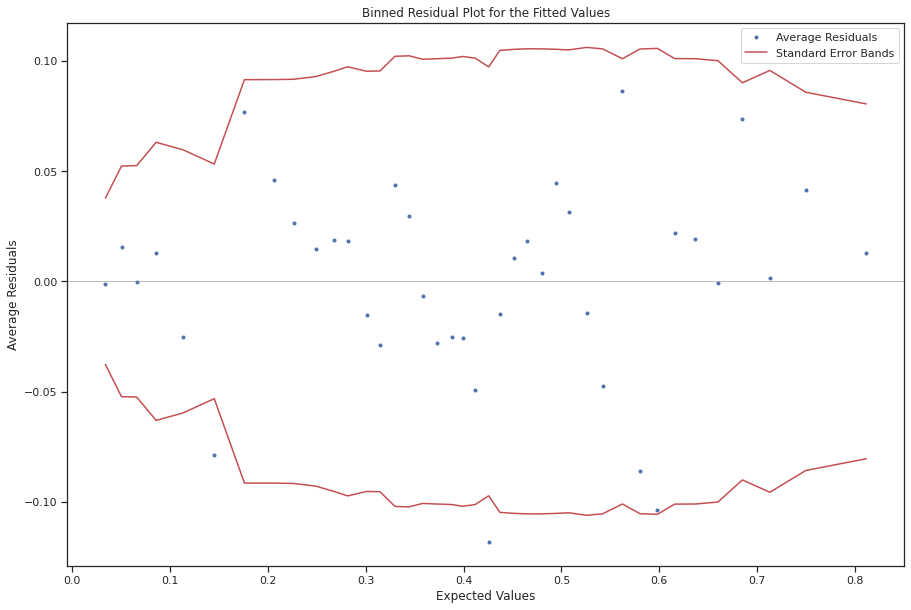

In [ ]:
fitted_resids = bin_residuals(new_model1.resid_response,new_model1.predict(train_data1.drop(labels='Status_exp_2', axis=1)), 40)

plt.figure(figsize = (15, 10))
plt.title('Binned Residual Plot for the Fitted Values')
plt.ylabel('Average Residuals')
plt.xlabel('Expected Values')
plot_binned_residuals(fitted_resids)
plt.show()

#### **Model Evaluation**
* We used the test set to evaluate the performance of the model.
* The accuracy 68%
* The model was able to classify the unemployed class better than the employed class since there was class imbalance.

accuracy : 0.6886688668866887


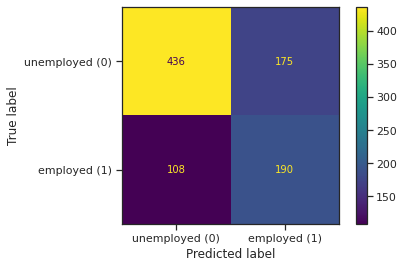

In [ ]:
predictions = new_model1.predict(test_data1.drop(labels='Status_exp_2', axis=1))
from sklearn.metrics import mean_squared_error,ConfusionMatrixDisplay, confusion_matrix, accuracy_score, mean_absolute_error
prediction = list(map(round, predictions))
cm = confusion_matrix(prediction, test_data1.Status_exp_2, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['unemployed (0)','employed (1)'])
disp.plot(values_format='');
print("accuracy :",accuracy_score(prediction, test_data1.Status_exp_2))

<a name='mf'></a>
### **Hypothesis Testing**

#### **Contructing the Hypothesis**

* $H_0: \beta_i = 0$ $\forall i \in \{0,1,...,14\}$<br>
  * The Null Hypothesis states that the coefficient of each independent variable and the intercept is zero.  
  * It implies that each independent variable is insignificant to the Logistic Regression Model.

* $H_1: \beta_i \neq 0$ $\forall i \in \{0,1,...,14\}$
* **Appropriateness of Test**: We chose this test since we wanted to check if each variable affects youth unemployment.

In [ ]:
p_values = new_model1.pvalues.to_numpy()

#### **Test Statistic**
* For the test statistics, we used the Wald $\chi^2$ statistics that are used to test the significance of individual coefficients in the model.
* Each Wald statistic is compared with a $\chi^2$ distribution with 1 degree of freedom

#### **Determine the p-value**
* We used the p-values from the summary table above

#### **Setting the threshold**
*  To determine the statistical significance of the p-value, we set the threshold to 5%

#### **Evaluation of the test**
* We reject the NUll Hypothesis if the p-value associated with each variable $x_i$ is less than 0.05, otherwise we FAIL to reject.


In [ ]:
for i in range(0,len(p_values)):
  print("The p-values associated with ","β",i, p_values[i])

The p-values associated with  β 0 2.20273555837599e-32
The p-values associated with  β 1 1.6259681013845394e-43
The p-values associated with  β 2 2.978035714425256e-21
The p-values associated with  β 3 5.449886954120974e-13
The p-values associated with  β 4 1.658125548063731e-06
The p-values associated with  β 5 0.024981333801093655
The p-values associated with  β 6 5.165495655091804e-05
The p-values associated with  β 7 9.049333424598839e-07
The p-values associated with  β 8 0.00010772182063652977
The p-values associated with  β 9 0.0008367678192382678
The p-values associated with  β 10 0.7462060497422902
The p-values associated with  β 11 0.00426099999655862
The p-values associated with  β 12 0.005862475065807099
The p-values associated with  β 13 0.004227757040482854
The p-values associated with  β 14 0.009955306270037746


* Therefore we rejected the NULL hypothesis for $\beta_i$ for $i \in \{1,2,...,9\}$, $\beta_{11}$ and $\beta_i$ for $i \in \{11,12,...,14\}$ since the p-values associated with those $\beta$ values are less than 0.05.
* We failed to reject the NULL hypothesis for $\beta_{10}$.

In [ ]:
print(new_model1.summary())

                           Logit Regression Results                           
Dep. Variable:           Status_exp_2   No. Observations:                 3634
Model:                          Logit   Df Residuals:                     3619
Method:                           MLE   Df Model:                           14
Date:                Mon, 21 Jun 2021   Pseudo R-squ.:                  0.1386
Time:                        21:19:00   Log-Likelihood:                -2108.5
converged:                       True   LL-Null:                       -2447.9
Covariance Type:            nonrobust   LLR p-value:                8.722e-136
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.8053      0.406     11.848      0.000       4.010       5.600
Q14AGE             -0.1341      0.010    -13.832      0.000      -0.153      -0.115
Q15POPULATION_4    -1.7963      

### **Interpreting Results**
* Because we one-hot encoded the race population, we compared all the other three races from the dropped African race column. We noted that the White Race (Q15POPULATION_4) has the highest coefficient magnitude among the Race variables. It means that, if we compare Africans to Whites, there is a -1.7963 change in the log of the odds of unemployment. Whites are the most favoured race when it comes to employment.
* Similarly, We one-hot encoded the province variable. We compared all the other eight provinces from the dropped Western Cape column. We noted that the Limpopo province (Province_9) has the highest coefficient magnitude among the province variables. It means that, if we compare the Western Cape province to the Limpopo province, there is a 0.9457 change in the log of the odds of unemployment. The Limpopo province is the worst affected when it comes to unemployment.
* When you compare male to female, there is a 0.3071 change in the log of odds of unemployment.
* As one ages the log of odds of unemployment reduces by 0.1341. This could be due to the experience obtained in previous years.
* As one advances from one Education level (Q17EDUCATION) to another, the log of odds of unemployment decrease by 0.0869.

#### **Conclusion**

* Most of the factors that impact the youth employment, are not due to study choices but to the structural nature of the SA economy such as inequality and legacies of Apartheid. The next we might need to dwelve more into these a little better.

* It confirms that Africans compared to all the other races in South Africa, have the short end of the stick when it comes to employment.

* The main factors affecting youth unemployment  are Race, Province and the education level attained.

* From the above analysis, we can conclude that there is indeed a correlation between graduate unemployment in South Africa and various study choices and demographics.

<a name='m2'></a>
# **Logistic Regression - Model 2**
### **Description of Model 2**

* This problem is a binary classification which is defined as $y_i = \left\{ \begin{array}{rcl} 1 & \text{if unemployed} \\ 0 & \text{if employed}     \end{array}\right.$
* Model 2 is given by the following logistic function:<br>
  * Let $\beta=\left[\beta_0,\beta_1,\beta_{2}\right]$ represent a vector of coefficients of the logistic model and $\textbf{P}=\left[\text{1}, \text{critical_skills}, \text{highest_education_level}\right]$ represent a vector of variables of the logistic model, with critical skills derived from [Study field](#study) according to the Department of Home Affairs` critical skills list. (ref: http://www.dha.gov.za/images/immigration_critical_skills.pdf).<br>
  * Then $\log(\text{odds of being unemployed}) = \beta \textbf{P}$

### **Data coding**

* We used Dummy encoding(Q18FIELD, Status_exp) to split categories into indicator variables.
* We used label enconding on Q17EDUCATION since it is a ordinal category variable

In [ ]:
youth4 = youth2[['Q18FIELD','Q17EDUCATION','Status_exp']].copy()
youth4.replace({'Q18FIELD': {1:'1', 2:'1', 3:'0', 4:'1', 5:'1', 6:'1', 7:'1', 8:'1', 9:'1', 10:'0', 
                               11:'0', 12:'0', 13:'0', 14:'0', 15:'1', 16:'1', 17:'1', 18:'0', 19:'0',
                             20:'0', 21:'0', 22:'0', 23:'0', 24:'1', 25:'1', 26:'1', 27:'1', 28:'0', 29:'1', 30:'1', 31:'1', 32:'1',33:'0',
                             34:'0', 35:'0', 36:'1', 37:'1', 38:'0'},'Status_exp':{1:'0',2:'1'}}, inplace=True)
youth4['Q17EDUCATION'] = youth4['Q17EDUCATION'].astype('int')
youth4_dm = pd.get_dummies(youth4, columns=['Q18FIELD','Status_exp'], drop_first=True)

### **Data Splitting**

* We first shuffled the dataset.
* The data was split into the train (80%) and test(20%) datasets.
* We extracted the X and y values from the dataset.

In [ ]:
#shuffle data
#youth4_dm = youth4_dm.sample(frac = 1, random_state=3)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(youth4_dm.drop(labels='Status_exp_1',axis=1),youth4_dm['Status_exp_1'], stratify=youth4_dm['Status_exp_1'], shuffle=True,test_size=0.2, random_state=2)
#stratify=youth3['Status_exp_1'], gave me errors and I took it out
train_data2 = X_train.copy()
train_data2['Status_exp_1'] = y_train
test_data2 = X_test.copy()
test_data2['Status_exp_1']=y_test

### **Initial Modelling - Model 2**

* For the initial model we fitted the model with none the variables and used used the Forward Selection Stepwise regression to identify variables that we could recursively add to the initial model.
* The initial model only contained the intercept. 
* To measure model fit, we used the Pseudo R Squared.
* The initial model fit Psuedo R Squared scored was 1.339e-10.


In [ ]:
model2 = smf.logit(formula='Status_exp_1 ~ 1 ', data=train_data2).fit(disp=0)
print(model2.summary())

                           Logit Regression Results                           
Dep. Variable:           Status_exp_1   No. Observations:                 3634
Model:                          Logit   Df Residuals:                     3633
Method:                           MLE   Df Model:                            0
Date:                Mon, 21 Jun 2021   Pseudo R-squ.:               1.339e-10
Time:                        21:19:00   Log-Likelihood:                -2447.9
converged:                       True   LL-Null:                       -2447.9
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3993      0.034    -11.799      0.000      -0.466      -0.333


#### **Stepwise Regression for model 2**
* To test if the model improves, we used the Forward Selection Stepwise regression.
* Higher Pseudo R Squared values were obtained as we added each variable indicating better model fit.
* The Forward Selection Stepwise regression retained all the variables.
* It implies that as we add subsequent variables after starting with the intercept, the estimated performance of the model keeps on improving.
* The final Pseudo R Square score was 0.04582 which is better than the score for the initial model.

In [ ]:
new_model2 = forward_selected(train_data2,'Status_exp_1')
print(new_model2.summary())

                           Logit Regression Results                           
Dep. Variable:           Status_exp_1   No. Observations:                 3634
Model:                          Logit   Df Residuals:                     3631
Method:                           MLE   Df Model:                            2
Date:                Mon, 21 Jun 2021   Pseudo R-squ.:                 0.03604
Time:                        21:19:00   Log-Likelihood:                -2359.7
converged:                       True   LL-Null:                       -2447.9
Covariance Type:            nonrobust   LLR p-value:                 4.867e-39
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.8942      0.257     11.273      0.000       2.391       3.397
Q17EDUCATION    -0.1382      0.011    -12.686      0.000      -0.160      -0.117
Q18FIELD_1      -0.2702      0.076     -3.55

#### **Binned Residual Analysis**

* The orange lines represent ± 2 Standard Error (SE) bands, and as expected they contain over 90% of the observations i.e 36 out of 40 binned observations are inside of the SE bands. 
* This model looks reasonable as there are no patterns and also the majority of the fitted values seem to fall within the SE bands. 

In [ ]:
def bin_residuals(resid, var, bins):
    '''
    Compute average residuals within bins of a variable.

    Returns a dataframe indexed by the bins, with the bin midpoint,
    the residual average within the bin, and the confidence interval
    bounds.
    '''
    resid_df = pd.DataFrame({'var': var, 'resid': resid})
    resid_df['bins'] = pd.qcut(var.rank(method = "first"), bins)
    bin_group = resid_df.groupby('bins')
    bin_df = bin_group[['var', 'resid']].mean()
    bin_df['count'] = bin_group['resid'].count()
    bin_df['lower_ci'] = -2 * (bin_group['resid'].std() /
    np.sqrt(bin_group['resid'].count()))
    bin_df['upper_ci'] = 2 * (bin_group['resid'].std() /
    np.sqrt(bin_df['count']))
    bin_df = bin_df.sort_values('var')
    #display(bin_df)
    return(bin_df)

def plot_binned_residuals(bin_df):
    '''
    Plotted binned residual averages and confidence intervals.
    '''
    plt.plot(bin_df['var'], bin_df['resid'], '.')
    plt.plot(bin_df['var'], bin_df['lower_ci'], '-r')
    plt.plot(bin_df['var'], bin_df['upper_ci'], '-r')
    plt.axhline(0, color = 'gray', lw = .5)
    plt.legend(['Average Residuals', 'Standard Error Bands'])

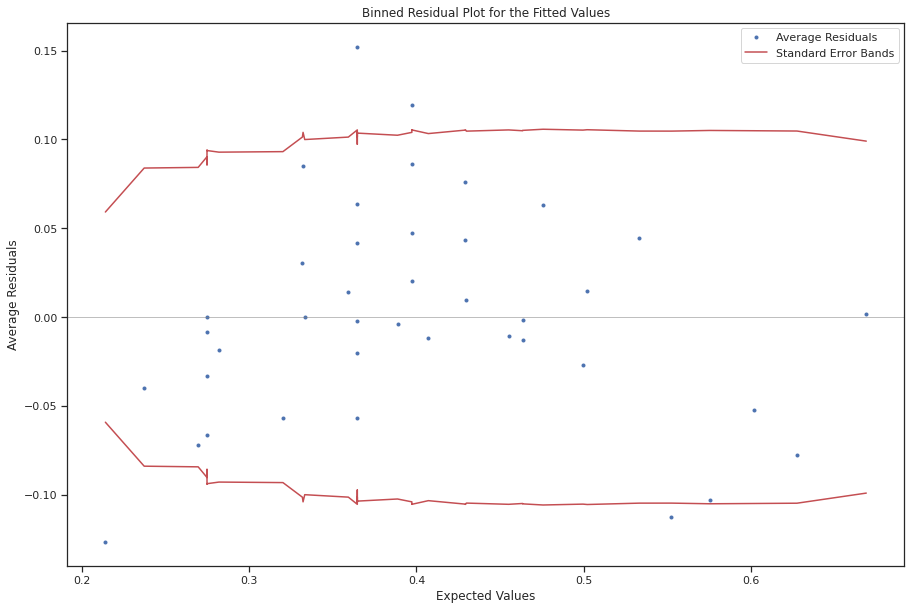

In [ ]:
fitted_resids = bin_residuals(new_model2.resid_response,new_model2.predict(train_data2.drop(labels='Status_exp_1', axis=1)), 40)

plt.figure(figsize = (15, 10))
plt.title('Binned Residual Plot for the Fitted Values')
plt.ylabel('Average Residuals')
plt.xlabel('Expected Values')
plot_binned_residuals(fitted_resids)
plt.show()

#### **Model Evaluation**
* We used the test set to evaluate the performance of the model.
* The accuracy was 61%
* The model was able to classify the unemployed class better than the employed class since there was class imbalance.

accuracy : 0.6171617161716172


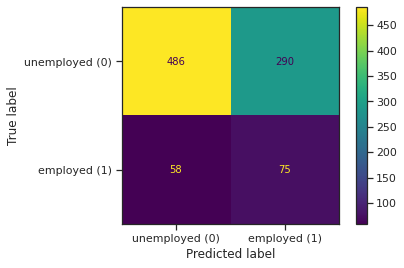

In [ ]:
predictions = new_model2.predict(test_data2.drop(labels='Status_exp_1', axis=1))
from sklearn.metrics import mean_squared_error,ConfusionMatrixDisplay, confusion_matrix, accuracy_score, mean_absolute_error
prediction = list(map(round, predictions))
cm = confusion_matrix(prediction, test_data2.Status_exp_1, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['unemployed (0)','employed (1)'])
disp.plot(values_format='');
print("accuracy :",accuracy_score(prediction, test_data2.Status_exp_1))

<a name='mf'></a>
#### **Hypothesis Testing**

##### **Contructing the Hypothesis**

* $H_0: \beta_i = 0$ $\forall i \in \{0,1,...,3\}$<br>
  * The Null Hypothesis states that the coefficient of each independent variable and the intercept is zero.  
  * It implies that each independent variable is insignificant to the Logistic Regression Model.

* $H_1: \beta_i \neq 0$ $\forall i \in \{0,1,...,3\}$
* **Appropriateness of Test**: We chose this test since we wanted to check if each variable affects youth unemployment.

##### **Test Statistic**
* For the test statistics, we used the Wald $\chi^2$ statistics that are used to test the significance of individual coefficients in the model.
* Each Wald statistic is compared with a $\chi^2$ distribution with 1 degree of freedom

##### **Determine the p-value**
* We used the p-values from the summary table above

In [ ]:
p_values = new_model2.pvalues.to_numpy()

##### **Setting the threshold**
*  To determine the statistical significance of the p-value, we set the threshold to 5%

##### **Evaluation of the test**
* We reject the NULL Hypothesis if the p-value associated with each variable $x_i$ is less than 0.05, otherwise we FAIL to reject.


In [ ]:
for i in range(0,len(p_values)):
  print("The p-values associated with ","β",i, p_values[i])

The p-values associated with  β 0 1.7762010424210452e-29
The p-values associated with  β 1 7.112247292224455e-37
The p-values associated with  β 2 0.000380703102071823


* Therefore we rejected the NULL hypothesis for $\beta_i$ for $i \in \{1,2,3\}$ since the p-values associated with those $\beta$ values are less than 0.05.

##### **Interpreting Results**
* All the coefficients are negative, meaning any step increase in each variable reduces the log of the odds of unemployment. 
* The critical skill variable has a bigger magnitude of the coefficient, meaning that each change from non-critical skill related course to a critical skill related cause, it reduces the log of the odds of employment by 0.2702.


##### **Conclusion**

* Our analysis indicates that proceeding with education level to a higher level and pursuing courses related to critical skills improves the chances of employment.
* We accept our assumption that graduates that studied courses that are not related to critical skills and acquired the lowest NQF level are likely to be unemployed.
* Its therefore important to encourage the youth to study more on critical skill-related courses and advance to higher levels


<a name='m3'></a>
# **Logistic Regression - Model 3**
### **Description of Model 3**

* This problem is a binary classification which is defined as $y_i = \left\{ \begin{array}{rcl} 1 & \text{if unemployed} \\ 0 & \text{if employed}     \end{array}\right.$
* Model 3 is given by the following logistic function:<br>
Let $\beta=\left[\beta_0,\beta_1,...,\beta_{15}\right]$ represent a vector of coefficients of the logistic model and $\textbf{P}$ represent a vector of variables of the [Highest education level](#highest_edu).<br>
Then $\log(\text{odds of being unemployed}) = \beta \textbf{P}$

### **Data coding**

* We used Dummy encoding to split categories into indicator variables.

In [ ]:
youth3 = youth2[['Q17EDUCATION','Status_exp']].copy()

In [ ]:
youth3_dm = pd.get_dummies(youth3, columns=['Q17EDUCATION','Status_exp'], drop_first=True)
youth3_dm.drop(columns='Status_exp_4',axis=1,inplace=True)

### **Data Splitting**

* We first shuffled the dataset.
* The data was split into the train (80%) and test(20%) datasets.
* We extracted the X and y values from the dataset.

In [ ]:
#shuffle data
#youth4_dm = youth4_dm.sample(frac = 1, random_state=3)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(youth3_dm.drop(labels='Status_exp_2',axis=1),youth3_dm['Status_exp_2'], stratify=youth3_dm['Status_exp_2'], shuffle=True,test_size=0.2, random_state=2)
#stratify=youth3['Status_exp_1'], gave me errors and I took it out
train_data3 = X_train.copy()
train_data3['Status_exp_2'] = y_train
test_data3 = X_test.copy()
test_data3['Status_exp_2']=y_test

### **Initial Modelling - Model 3**

* For the initial model we fitted the model with none the variables and used used the Forward Selection Stepwise regression to identify variables that we could recursively add to the initial model.
* The initial model only contained the intercept. 
* To measure model fit, we used the Pseudo R Squared.
* The initial model fit Psuedo R Squared scored was 1.339e-10.


In [ ]:
model3_data = train_data3[['Q17EDUCATION_15', 'Q17EDUCATION_16',
       'Q17EDUCATION_17', 'Q17EDUCATION_18', 'Q17EDUCATION_19',
       'Q17EDUCATION_20', 'Q17EDUCATION_21', 'Q17EDUCATION_22',
       'Q17EDUCATION_23', 'Q17EDUCATION_24', 'Q17EDUCATION_25',
       'Q17EDUCATION_26', 'Q17EDUCATION_27', 'Q17EDUCATION_28',
       'Q17EDUCATION_29','Status_exp_2']]
model3 = smf.logit(formula='Status_exp_2 ~ 1 ', data=model3_data).fit()
print(model3.summary())

Optimization terminated successfully.
         Current function value: 0.673610
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:           Status_exp_2   No. Observations:                 3634
Model:                          Logit   Df Residuals:                     3633
Method:                           MLE   Df Model:                            0
Date:                Mon, 21 Jun 2021   Pseudo R-squ.:               1.339e-10
Time:                        21:19:01   Log-Likelihood:                -2447.9
converged:                       True   LL-Null:                       -2447.9
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3993      0.034    -11.799      0.000      -0.466      -0.333


#### **Stepwise Regression for model 3**
* To test if the model improves, we used the Forward Selection Stepwise regression.
* Higher Pseudo R Squared values were obtained as we added each variable indicating better model fit.
* The Forward Selection Stepwise regression retained all the variables.
* It implies that as we add subsequent variables after starting with the intercept, the estimated performance of the model keeps on improving.
* The final Pseudo R Square score was 0.04582 which is better than the score for the initial model.

In [ ]:
new_model3 = forward_selected(model3_data,'Status_exp_2')
print(new_model3.summary())

                           Logit Regression Results                           
Dep. Variable:           Status_exp_2   No. Observations:                 3634
Model:                          Logit   Df Residuals:                     3618
Method:                           MLE   Df Model:                           15
Date:                Mon, 21 Jun 2021   Pseudo R-squ.:                 0.04485
Time:                        21:19:10   Log-Likelihood:                -2338.1
converged:                       True   LL-Null:                       -2447.9
Covariance Type:            nonrobust   LLR p-value:                 2.153e-38
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.4595      0.369      1.246      0.213      -0.263       1.182
Q17EDUCATION_26    -1.4019      0.379     -3.703      0.000      -2.144      -0.660
Q17EDUCATION_29   -46.5231   1.4

#### **Binned Residual Analysis**

* The orange lines represent ± 2 Standard Error (SE) bands, and as expected they contain over 90% of the observations i.e 36 out of 38 binned observations are inside of the SE bands. 
* This model looks reasonable as there are no patterns and also the majority of the fitted values seem to fall within the SE bands. 

In [ ]:
def bin_residuals(resid, var, bins):
    '''
    Compute average residuals within bins of a variable.

    Returns a dataframe indexed by the bins, with the bin midpoint,
    the residual average within the bin, and the confidence interval
    bounds.
    '''
    resid_df = pd.DataFrame({'var': var, 'resid': resid})
    resid_df['bins'] = pd.qcut(var.rank(method = "first"), bins)
    bin_group = resid_df.groupby('bins')
    bin_df = bin_group[['var', 'resid']].mean()
    bin_df['count'] = bin_group['resid'].count()
    bin_df['lower_ci'] = -2 * (bin_group['resid'].std() /
    np.sqrt(bin_group['resid'].count()))
    bin_df['upper_ci'] = 2 * (bin_group['resid'].std() /
    np.sqrt(bin_df['count']))
    bin_df = bin_df.sort_values('var')
    #display(bin_df)
    return(bin_df)

def plot_binned_residuals(bin_df):
    '''
    Plotted binned residual averages and confidence intervals.
    '''
    plt.plot(bin_df['var'], bin_df['resid'], '.')
    plt.plot(bin_df['var'], bin_df['lower_ci'], '-r')
    plt.plot(bin_df['var'], bin_df['upper_ci'], '-r')
    plt.axhline(0, color = 'gray', lw = .5)
    plt.legend(['Average Residuals', 'Standard Error Bands'])

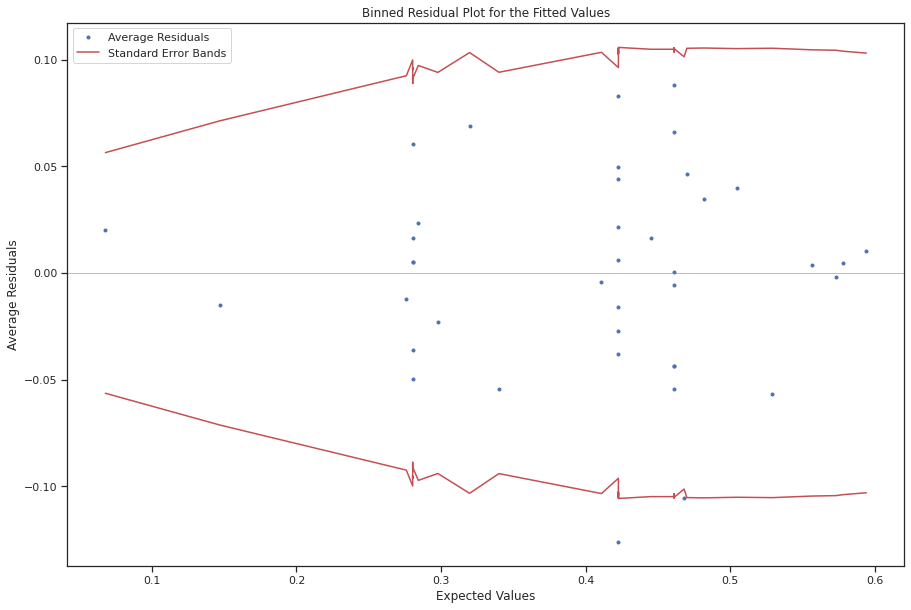

In [ ]:
fitted_resids = bin_residuals(new_model3.resid_response,new_model3.predict(model3_data.drop(labels='Status_exp_2', axis=1)), 40)

plt.figure(figsize = (15, 10))
plt.title('Binned Residual Plot for the Fitted Values')
plt.ylabel('Average Residuals')
plt.xlabel('Expected Values')
plot_binned_residuals(fitted_resids)
plt.show()

#### **Model 3 Evaluation**
* We used the test set to evaluate the performance of the model.
* The accuracy was 61%
* The model was able to classify the unemployed class better than the employed class since there was class imbalance.

accuracy : 0.6138613861386139


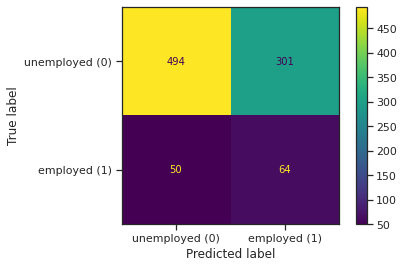

In [ ]:
predictions = new_model3.predict(test_data3.drop(labels='Status_exp_2', axis=1))
from sklearn.metrics import mean_squared_error,ConfusionMatrixDisplay, confusion_matrix, accuracy_score, mean_absolute_error
prediction = list(map(round, predictions))
cm = confusion_matrix(prediction, test_data3.Status_exp_2, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['unemployed (0)','employed (1)'])
disp.plot(values_format='');
print("accuracy :",accuracy_score(prediction, test_data3.Status_exp_2))

<a name='mf'></a>
#### **Hypothesis Testing**

##### **Contructing the Hypothesis**

* $H_0: \beta_i = 0$ $\forall i \in \{0,1,...,16\}$<br>
  * The Null Hypothesis states that the coefficient of each independent variable and the intercept is zero.  
  * It implies that each independent variable is insignificant to the Logistic Regression Model.

* $H_1: \beta_i \neq 0$ $\forall i \in \{0,1,...,16\}$
* **Appropriateness of Test**: We chose this test since we wanted to check if each variable affects youth unemployment.

##### **Test Statistic**
* For the test statistics, we used the Wald $\chi^2$ statistics that are used to test the significance of individual coefficients in the model.
* Each Wald statistic is compared with a $\chi^2$ distribution with 1 degree of freedom

##### **Determine the p-value**
* We used the p-values from the summary table above

In [ ]:
p_values = new_model3.pvalues.to_numpy()

##### **Setting the threshold**
*  To determine the statistical significance of the p-value, we set the threshold to 5%

##### **Evaluation of the test**
* We reject the NULL Hypothesis if the p-value associated with each variable $x_i$ is less than 0.05, otherwise we FAIL to reject.


In [ ]:
for i in range(0,len(p_values)):
  print("The p-values associated with ","β",i, p_values[i])

The p-values associated with  β 0 0.21267528624432186
The p-values associated with  β 1 0.00021289377034784766
The p-values associated with  β 2 0.9999999741699629
The p-values associated with  β 3 4.98877200351433e-07
The p-values associated with  β 4 0.002606508243489809
The p-values associated with  β 5 0.00206865702825344
The p-values associated with  β 6 0.03964287692756139
The p-values associated with  β 7 0.0069074433280331094
The p-values associated with  β 8 0.1022400935086944
The p-values associated with  β 9 0.05042000710811007
The p-values associated with  β 10 0.14035790665035405
The p-values associated with  β 11 0.26830513117393073
The p-values associated with  β 12 0.39740586819648094
The p-values associated with  β 13 0.5742123942784021
The p-values associated with  β 14 0.7056936981881243
The p-values associated with  β 15 0.7852343824907823


* Therefore we rejected the NULL hypothesis for $\beta_1$, $\beta_3$, $\beta_4$, $\beta_5$, $\beta_6$ and $\beta_7$ since the p-values associated with those $\beta$ values are less than 0.05.
* We failed to reject the NULL hypothesis for $\beta_0$, $\beta_2$, and $\beta_i$ for $i \in \{8,9,...,15\}$

##### **Interpreting Results**
* The variables with the highest magnitudes of coefficiencies are Q17EDUCATION_29, Q17EDUCATION_28, Q17EDUCATION_26, Q17EDUCATION_27, Q17EDUCATION_25, Q17EDUCATION_24. This means that the people with highest education level have lowest odds of being unemployed.
* As one advances from Honors level (Q17EDUCATION_29)  to Masters/PhD level    (Q17EDUCATION_29), the odds of unemployment decrease my a factor of 4
* Q17EDUCATION_17, Q17EDUCATION_20, Q17EDUCATION_16 and Q17EDUCATION_15 have positive coefficients meaning that canditates that have this qualifications have odds of being unemployed.


##### **Conclusion**

* Our analysis indicate that proceeding with education level to a higher level improves the chances of employement.
* We accept our assumption that a graduate with a higher national qualification framework (NQF) level is less likely to be unemployed.


<a name='m4'></a>
# **Logistic Regression - Model 4**
### **Description of Model 4**

* This problem is a binary classification which is defined as $y_i = \left\{ \begin{array}{rcl} 1 & \text{if unemployed} \\ 0 & \text{if employed}     \end{array}\right.$
* Model 4 is given by the following logistic function:<br>
Let $\beta=\left[\beta_0,\beta_1, ..., \beta_8\right]$ represent a vector of coefficients of the logistic model and $\textbf{P}$ represent a vector of the variables of the [Province](#province) which indicate the province the candidate is from.<br>
Then $\log(\text{odds of being unemployed}) = \beta \textbf{P}$

### **Data coding**

* We used Dummy encoding to split categories into indicator variables.

In [ ]:
youth4 = youth2[['Province','Status_exp']].copy()
#youth4.replace({'Metro_code': {1:'0', 2:'1', 3:'0', 4:'1', 5:'1', 6:'0', 7:'0', 8:'1', 9:'0', 10:'1', 
#                               11:'0', 12:'0', 13:'1', 14:'1', 15:'1', 16:'0', 17:'0' },'Status_exp':{1:'0',2:'1'}}, inplace=True)

In [ ]:
youth4_dm = pd.get_dummies(youth4, columns=['Province','Status_exp'], drop_first=True)
youth4_dm.drop(columns='Status_exp_4',axis=1,inplace=True)

### **Data Splitting**

* We first shuffled the dataset.
* The data was split into the train (80%) and test(20%) datasets.
* We extracted the X and y values from the dataset.

In [ ]:
#shuffle data
#youth4_dm = youth4_dm.sample(frac = 1, random_state=3)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(youth4_dm.drop(labels='Status_exp_2',axis=1),youth4_dm['Status_exp_2'], stratify=youth4_dm['Status_exp_2'], shuffle=True,test_size=0.2, random_state=2)
#stratify=youth3['Status_exp_1'], gave me errors and I took it out
train_data4 = X_train.copy()
train_data4['Status_exp_2'] = y_train
test_data4 = X_test.copy()
test_data4['Status_exp_2']=y_test

In [ ]:
train_data4.head()

,Province_2,Province_3,Province_4,Province_5,Province_6,Province_7,Province_8,Province_9,Status_exp_2
16385,0,0,0,1,0,0,0,0,1
32634,0,0,0,1,0,0,0,0,0
39397,0,0,0,0,0,0,1,0,1
29752,0,0,0,0,0,1,0,0,0
36051,0,0,0,0,0,1,0,0,0


### **Initial Modelling - Model 4**

* For the initial model we fitted the model with none of the variables and used used the Forward Selection Stepwise regression to identify variables that we could recursively add to the initial model.
* The initial model only contained the intercept. 
* To measure model fit, we used the Pseudo R Squared.
* The initial model fit Psuedo R Squared scored was 1.339e-10.


In [ ]:
model4 = smf.logit(formula='Status_exp_2 ~ 1', data=train_data4).fit()
print(model4.summary())

Optimization terminated successfully.
         Current function value: 0.673610
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:           Status_exp_2   No. Observations:                 3634
Model:                          Logit   Df Residuals:                     3633
Method:                           MLE   Df Model:                            0
Date:                Mon, 21 Jun 2021   Pseudo R-squ.:               1.339e-10
Time:                        21:19:11   Log-Likelihood:                -2447.9
converged:                       True   LL-Null:                       -2447.9
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3993      0.034    -11.799      0.000      -0.466      -0.333


#### **Stepwise Regression for model 4**
* To test if the model improves, we used the Forward Selection Stepwise regression.
* Higher Pseudo R Squared values were obtained as we added each variable indicating better model fit.
* The Forward Selection Stepwise regression retained all the variables.
* It implies that as we add subsequent variables after starting with the intercept, the estimated performance of the model keeps on improving.
* The final Pseudo R Square score was 0.03006 which is better than the score for the initial model.

In [ ]:
new_model4 = forward_selected(train_data4,'Status_exp_2')
print(new_model4.summary())

                           Logit Regression Results                           
Dep. Variable:           Status_exp_2   No. Observations:                 3634
Model:                          Logit   Df Residuals:                     3625
Method:                           MLE   Df Model:                            8
Date:                Mon, 21 Jun 2021   Pseudo R-squ.:                 0.03006
Time:                        21:19:13   Log-Likelihood:                -2374.3
converged:                       True   LL-Null:                       -2447.9
Covariance Type:            nonrobust   LLR p-value:                 7.607e-28
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4157      0.136    -10.395      0.000      -1.683      -1.149
Province_9     1.6172      0.162      9.963      0.000       1.299       1.935
Province_8     1.3780      0.176      7.810      0.0

#### **Binned Residual Analysis**

* The orange lines represent ± 2 Standard Error (SE) bands, and as expected they contain over 90% of the observations i.e 28 out of 28 binned observations are inside of the SE bands. 
* This model looks reasonable as there are no patterns and also the majority of the fitted values seem to fall within the SE bands. 

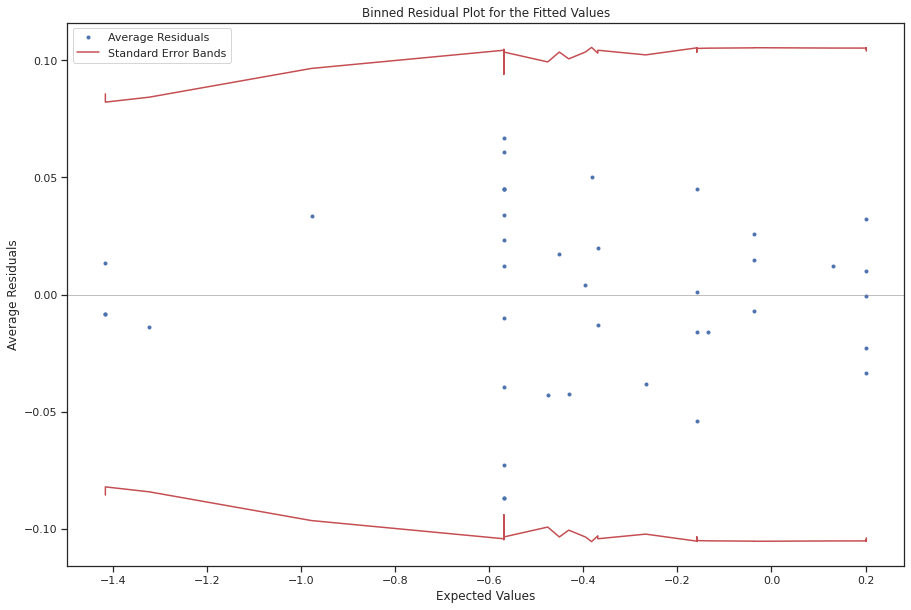

In [ ]:
fitted_resids = bin_residuals(new_model4.resid_response,new_model4.fittedvalues, 40)

plt.figure(figsize = (15, 10))
plt.title('Binned Residual Plot for the Fitted Values')
plt.ylabel('Average Residuals')
plt.xlabel('Expected Values')
plot_binned_residuals(fitted_resids)
plt.show()

#### **Model Evaluation**
* We used the test set to evaluate the performance of the model.
* The accuracy was 60%
* The model was able to classify the unemployed class better than the employed class since there was class imbalance.

accuracy : 0.6039603960396039


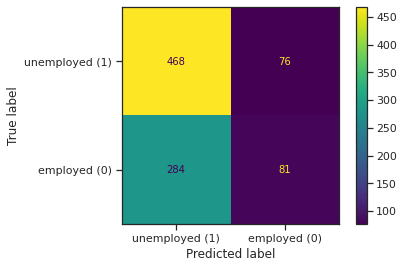

In [ ]:
#predictions4 = new_model4.predict(test_data4.drop(labels='Status_exp_1', axis=1))
predictions4 = new_model4.predict(X_test)
from sklearn.metrics import mean_squared_error,ConfusionMatrixDisplay, confusion_matrix, accuracy_score, mean_absolute_error
prediction4 = list(map(round, predictions4))
#cm = confusion_matrix(test_data4.Status_exp_1, prediction4)
cm = confusion_matrix(y_test, prediction4)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['unemployed (1)','employed (0)'])
disp.plot(values_format='');
print("accuracy :",accuracy_score(prediction4, test_data4.Status_exp_2))

<a name='mf'></a>
#### **Hypothesis Testing**

##### **Contructing the Hypothesis**

* $H_0: \beta_i = 0$ $\forall i \in \{0,1,...,8\}$<br>
  * The Null Hypothesis states that the coefficient of each independent variable and the intercept is zero.  
  * It implies that each independent variable is insignificant to the Logistic Regression Model.

* $H_1: \beta_i \neq 0$ $\forall i \in \{0,1,...,8\}$
* **Appropriateness of Test**: We chose this test since we wanted to check if each variable affects youth unemployment.

##### **Test Statistic**
* For the test statistics, we used the Wald $\chi^2$ statistics that are used to test the significance of individual coefficients in the model.
* Each Wald statistic is compared with a $\chi^2$ distribution with 1 degree of freedom

##### **Determine the p-value**
* We used the p-values from the summary table above

In [ ]:
p_values = new_model4.pvalues.to_numpy()

##### **Setting the threshold**
*  To determine the statistical significance of the p-value, we set the threshold to 5%

##### **Evaluation of the test**
* We reject the NULL Hypothesis if the p-value associated with each variable $x_i$ is less than 0.05, otherwise we FAIL to reject.


In [ ]:
for i in range(0,len(p_values)):
  print("The p-values associated with ","β",i, p_values[i])

The p-values associated with  β 0 2.616709590521713e-25
The p-values associated with  β 1 2.223556765911557e-23
The p-values associated with  β 2 5.729455713576328e-15
The p-values associated with  β 3 1.8677116388015257e-14
The p-values associated with  β 4 1.160097685534422e-08
The p-values associated with  β 5 1.255507833119961e-08
The p-values associated with  β 6 6.472954922048489e-07
The p-values associated with  β 7 9.085836893088722e-07
The p-values associated with  β 8 0.11916217504066401


* Therefore we rejected the NULL hypothesis for $\beta_i$ for $i \in \{0,1,...,7\}$ since the p-values associated with those $\beta$ values are less than 0.05.
* We failed to reject the NULL hypothesis for $\beta_8$

In [ ]:
print(new_model4.summary())

                           Logit Regression Results                           
Dep. Variable:           Status_exp_2   No. Observations:                 3634
Model:                          Logit   Df Residuals:                     3625
Method:                           MLE   Df Model:                            8
Date:                Mon, 21 Jun 2021   Pseudo R-squ.:                 0.03006
Time:                        21:19:14   Log-Likelihood:                -2374.3
converged:                       True   LL-Null:                       -2447.9
Covariance Type:            nonrobust   LLR p-value:                 7.607e-28
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4157      0.136    -10.395      0.000      -1.683      -1.149
Province_9     1.6172      0.162      9.963      0.000       1.299       1.935
Province_8     1.3780      0.176      7.810      0.0

##### **Interpreting Results**
* The variables with the highest magnitudes of coefficiencies are Province_9, Province_8, Province_5, Province_2, Province_6. This means that the people living in these provinces have highest odds of being unemployment.
* All the coefficients are positive, as you move from  Western Cape, Eastern Cape, Northern Cape, Free State, KwaZulu-Natal, North West, Gauteng, Mpumalanga to Limpopo log of the odds ratio of being unemployed keep on increasing.



##### **Conclusion**
* Our analysis indicates that the Western Cape and Northern Cape provinces have the best chances of employment. Limpopo has the worst chances of employment.
* We accept our assumption that a graduate might need to migrate to certain provinces to increase her/his chances of employment.


# **Next Steps**
* To improve the models, we might need to increase the data samples.
* Instead of only measuring the effects of study choices and demographics, we might need to also measure the effects of macro economic trends like the Covid Pandemic, Global Financial Crisis and Political issues.